In [1]:
import numpy as np
import matplotlib.pyplot as plt
import torch
import torch.nn as nn
import matplotlib_inline
matplotlib_inline.backend_inline.set_matplotlib_formats('svg')

In [26]:
def create_data(m):
    N = 50
    x = torch.randn(N, 1)
    y = m*x + torch.randn(N,1)/2
    return x,y

In [30]:
def train(x,y):
    learning_rate = 0.05

    epochs=500
    losses = torch.zeros(epochs)

    ANN_reg = nn.Sequential(
        nn.Linear(1,1),
        nn.ReLU(),
        nn.Linear(1,1)
    )
    loss_func = nn.MSELoss()
    optimizer = torch.optim.SGD(ANN_reg.parameters(), lr=learning_rate)
    for epoch in range(epochs):
        yHat = ANN_reg(x)

        #loss func
        loss = loss_func(yHat, y)
        losses[epoch] = loss

        #backward
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

    predictions = ANN_reg(x)
    return predictions, losses

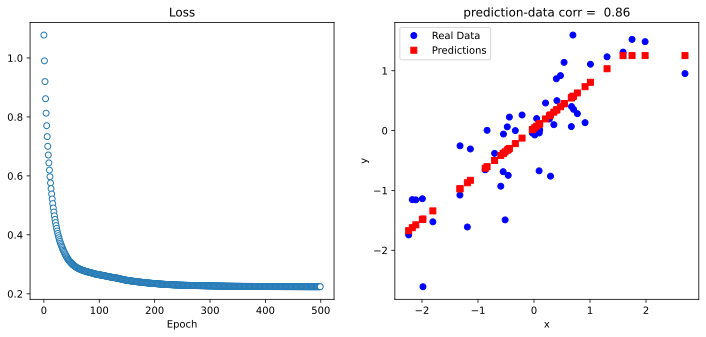

In [39]:
x,y = create_data(.8)

yHat, losses = train(x,y)

fig, ax = plt.subplots(1, 2, figsize=(12, 5))
ax[0].plot(losses.detach(), 'o', markerfacecolor='w', linewidth=.1)
ax[0].set_xlabel('Epoch')
ax[0].set_title('Loss')

ax[1].plot(x,y, 'bo', label='Real Data')
ax[1].plot(x, yHat.detach(), 'rs', label='Predictions')
ax[1].set_xlabel('x')
ax[1].set_ylabel('y')
ax[1].set_title(f'prediction-data corr = {np.corrcoef(y.T, yHat.detach().T)[0,1]: .2f}')
ax[1].legend()

plt.show()


In [40]:
slopes = np.linspace(-2,2,21)

numExps = 50

results = np.zeros((len(slopes), numExps, 2))

for slopei in range(len(slopes)):
    for  N in range(numExps):
        x,y = create_data(slopes[slopei])
        yHat, losses = train(x,y)
        results[slopei, N, 0] = losses[-1]
        results[slopei, N, 1] = np.corrcoef(y.T, yHat.detach().T)[0,1]

results[np.isnan(results)] = 0

/opt/homebrew/lib/python3.10/site-packages/numpy/lib/function_base.py:2853: RuntimeWarning: invalid value encountered in divide
  c /= stddev[:, None]
/opt/homebrew/lib/python3.10/site-packages/numpy/lib/function_base.py:2854: RuntimeWarning: invalid value encountered in divide
  c /= stddev[None, :]


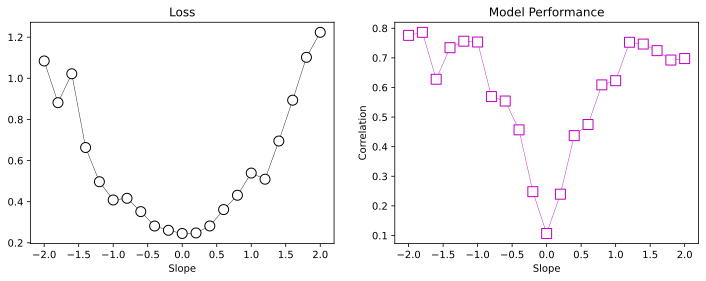

In [44]:
fig, ax = plt.subplots(1, 2, figsize=(12,4))

ax[0].plot(slopes, np.mean(results[:,:,0], axis=1), 'ko-', markerfacecolor='w', markersize=10, linewidth = .4)
ax[0].set_xlabel('Slope')
ax[0].set_title('Loss')

ax[1].plot(slopes, np.mean(results[:,:,1], axis=1), 'ms-', markerfacecolor='w', markersize=10, linewidth=.4)
ax[1].set_xlabel('Slope')
ax[1].set_ylabel('Correlation')
ax[1].set_title('Model Performance')

plt.show()